# Build Metadata.csv

## Columns:

* StationID: str
* lat: float
* lon: float
* availability: list of years: String or Int
* ....

In [65]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re

---
# 1) Get a list of available files:

In [66]:
url = "https://www.ndbc.noaa.gov/data/historical/stdmet/"
response = requests.get(url)

if response.status_code == 200:
    soup = BeautifulSoup(response.text, 'html.parser')
    body = soup.body
else:
    print('Error fetching website.')

In [67]:
pattern = r'\xa0\n(.*?\.txt\.gz)'  # Example: \xa0\n0y2w3h2012.txt.gz
file_names = re.findall(pattern, body.text)
file_names

['0y2w3h2012.txt.gz',
 '0y2w3h2013.txt.gz',
 '0y2w3h2014.txt.gz',
 '0y2w3h2015.txt.gz',
 '4cONFh2020.txt.gz',
 '4h361h2017.txt.gz',
 '4h361h2020.txt.gz',
 '4h361h2021.txt.gz',
 '4h363h2020.txt.gz',
 '4h363h2021.txt.gz',
 '4h364h2017.txt.gz',
 '4h365h2020.txt.gz',
 '4h365h2021.txt.gz',
 '4h390h2017.txt.gz',
 '4h390h2020.txt.gz',
 '4h390h2021.txt.gz',
 '4h394h2017.txt.gz',
 '4h394h2020.txt.gz',
 '4h394h2021.txt.gz',
 '18ci3h2014.txt.gz',
 '18ci3h2015.txt.gz',
 '20cm4h2014.txt.gz',
 '20cm4h2015.txt.gz',
 '32st1h2009.txt.gz',
 '32st1h2010.txt.gz',
 '32st1h2022.txt.gz',
 '32st2h2007.txt.gz',
 '32st2h2008.txt.gz',
 '32st2h2009.txt.gz',
 '32st2h2010.txt.gz',
 '32st2h2011.txt.gz',
 '32st2h2012.txt.gz',
 '32st2h2013.txt.gz',
 '32st2h2014.txt.gz',
 '32st2h2015.txt.gz',
 '32st2h2016.txt.gz',
 '32st2h2017.txt.gz',
 '32st2h2018.txt.gz',
 '32st2h2019.txt.gz',
 '32st2h2020.txt.gz',
 '32st2h2021.txt.gz',
 '41nt1h2007.txt.gz',
 '41nt1h2008.txt.gz',
 '41nt1h2009.txt.gz',
 '41nt1h2010.txt.gz',
 '41nt1h20

In [68]:
available_files = {}

for filename in file_names:

    pattern = r'(.+?)h(\d{4})\.txt\.gz'
    match = re.match(pattern, filename)

    station = match.group(1)
    year = int(match.group(2))

    if station not in available_files:
        available_files[station] = { year }
    else:
        available_files[station].add(year)

In [69]:
available_files

{'0y2w3': {2012, 2013, 2014, 2015},
 '4cONF': {2020},
 '4h361': {2017, 2020, 2021},
 '4h363': {2020, 2021},
 '4h364': {2017},
 '4h365': {2020, 2021},
 '4h390': {2017, 2020, 2021},
 '4h394': {2017, 2020, 2021},
 '18ci3': {2014, 2015},
 '20cm4': {2014, 2015},
 '32st1': {2009, 2010, 2022},
 '32st2': {2007,
  2008,
  2009,
  2010,
  2011,
  2012,
  2013,
  2014,
  2015,
  2016,
  2017,
  2018,
  2019,
  2020,
  2021},
 '41nt1': {2007,
  2008,
  2009,
  2010,
  2012,
  2013,
  2014,
  2015,
  2016,
  2017,
  2018,
  2019,
  2020,
  2021,
  2022},
 '41nt2': {2008, 2010},
 '42a02': {2000},
 '42a03': {2000},
 '42otp': {2000},
 '43WSL': {2019, 2020},
 '45T01': {2018},
 '46a35': {2001},
 '46a54': {1996},
 '51wh1': {2008,
  2009,
  2010,
  2011,
  2012,
  2013,
  2014,
  2015,
  2016,
  2017,
  2018,
  2019,
  2020,
  2021,
  2022},
 '51wh2': {2007, 2008, 2009, 2010, 2011, 2012},
 '53ANF': {2020},
 '53MKF': {2020},
 '23020': {2008, 2009, 2010},
 '31201': {2005},
 '32012': {2007,
  2008,
  2009,
 

available_files is a dictionary of stations. The value of each station is a set of the years, where a file exists!

In [70]:
# create a list of all years in the sets
all_years = sorted(list(set.union(*[value for value in available_files.values()])))

# create an empty DataFrame with columns as years and index as dictionary keys
metadata_0 = pd.DataFrame(index=available_files.keys(), columns=all_years)

# fill the DataFrame with Boolean values
for key, value in available_files.items():
    for year in all_years:
        metadata_0.loc[key, year] = year in value

# print the DataFrame
print(metadata_0)

        1970   1971   1972   1973   1974   1975   1976   1977   1978   1979  \
0y2w3  False  False  False  False  False  False  False  False  False  False   
4cONF  False  False  False  False  False  False  False  False  False  False   
4h361  False  False  False  False  False  False  False  False  False  False   
4h363  False  False  False  False  False  False  False  False  False  False   
4h364  False  False  False  False  False  False  False  False  False  False   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
yabp4  False  False  False  False  False  False  False  False  False  False   
yata2  False  False  False  False  False  False  False  False  False  False   
ygnn6  False  False  False  False  False  False  False  False  False  False   
ykrv2  False  False  False  False  False  False  False  False  False  False   
yktv2  False  False  False  False  False  False  False  False  False  False   

       ...   2013   2014   2015   2016   2017   201

In [71]:
# print("Number of Stations:", len(metadata_0))
# print("First year: ", all_years[0])
# print("Last year: ", all_years[-1])
# print("Number of available files: ", metadata_0.sum().sum())

---
# 2) Add GPS coordinations (latitude and longitude)

## 2.1) From NDBC Metadata

In [72]:
# url = "https://www.ndbc.noaa.gov/metadata/stationmetadata.xml"
# response = requests.get(url)
#
# if response.status_code == 200:
#     # Passing the stored data inside the beautifulsoup parser
#     bs_data = BeautifulSoup(response.content, 'xml')
# else:
#     print('Error fetching website.')

In [73]:
# stations = bs_data.find_all('stations')[0]
# print(stations)

In [74]:
# station_list = stations.find_all("station")
# station_list[0]

In [75]:
# ids = []
# owners = []
# types = []
# lats = []
# lons = []
#
# for station in station_list:
#     ids.append(station['id'])
#     owners.append(station['owner'])
#     types.append(station['type'])
#
#     histories = station.find_all("history")
#
#     current_lat = []
#     current_lon = []
#     for history in histories:
#         current_lat.append(float(history['lat']))
#         current_lon.append(float(history['lng']))
#
#     average_lat = (sum(current_lat) / len(current_lat))
#     average_lon = (sum(current_lon) / len(current_lon))
#
#     #Round to value that matches ERA5 grid
#     #   Reanalysis: 0.25° x 0.25° (atmosphere),
#     #               0.5° x  0.5°  (ocean waves)
#     # For now, I do round to 0.5° but this may need to be adopted
#     average_lat = round(average_lat * 2) / 2
#     average_lon = round(average_lon * 2) / 2
#
#     lats.append(average_lat)
#     lons.append(average_lon)
#
# metadata_xml = pd.DataFrame({
#     "StationID": ids,
#     "owner": owners,
#     "type": types,
#     "lat": lats,
#     "lon": lons,
# })
#
# metadata_xml

---
# Merging the two dataframes

In [12]:
# merge the two dataframes based on StationID
#metadata_1 = metadata_0.join(metadata_xml.set_index('StationID')[['owner', 'type', 'lat', 'lon']])

In [79]:
metadata_1 = metadata_0.copy()
metadata_1['owner'] = pd.Series(dtype=str)
metadata_1['type'] = pd.Series(dtype=str)
metadata_1['lat'] = pd.Series(dtype=float)
metadata_1['lon'] = pd.Series(dtype=float)
metadata_1

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2017,2018,2019,2020,2021,2022,owner,type,lat,lon
0y2w3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,NaN,NaN,NaN,NaN
4cONF,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,NaN,NaN,NaN,NaN
4h361,False,False,False,False,False,False,False,False,False,False,...,True,False,False,True,True,False,NaN,NaN,NaN,NaN
4h363,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,NaN,NaN,NaN,NaN
4h364,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yabp4,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,False,NaN,NaN,NaN,NaN
yata2,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,NaN,NaN,NaN,NaN
ygnn6,False,False,False,False,False,False,False,False,False,False,...,True,True,True,False,False,True,NaN,NaN,NaN,NaN
ykrv2,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,NaN,NaN,NaN,NaN


---
## 2.2) Get the remaining coordinates from NDBC station pages

only those that are not included in metadata!

In [80]:
def scrape_metadata(StationID):
    url = f"https://www.ndbc.noaa.gov/station_page.php?station={StationID}"
    response = requests.get(url)
    #print(url)

    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        body = soup.body
        metadata = body.find('div', id='stn_metadata')
        return metadata
    else:
        print('Error fetching website.')
        return None

In [81]:
def convert_coordinate_string_to_float(coord_str):
    # Split the coordinate string into the numeric value and the direction
    numeric_str, direction = coord_str.split()

    # Convert the numeric string to a float value
    numeric_val = float(numeric_str)

    # If the direction is South or West, negate the numeric value
    if direction in ['S', 'W']:
        numeric_val *= -1

    return numeric_val

In [104]:
def webscraper(station_id):
     html_metadata = scrape_metadata(station_id)
     if html_metadata is not None:

        b_tags = html_metadata.find_all('b')
        owner = b_tags[0].text.replace('Owned and maintained by', '').strip()

        station_type = b_tags[1].text

        #COORDINATES
        metadata_string = html_metadata.prettify() #return as string
        match = re.search(r'(\d+\.\d+ [NS]) (\d+\.\d+ [EW])', metadata_string)
        latitude = match.group(1)
        longitude = match.group(2)
        lat = convert_coordinate_string_to_float(latitude)
        lon = convert_coordinate_string_to_float(longitude)

        #print("owner:", owner)
        #print("type:", station_type)
        return owner, station_type, lat, lon

     else:
         return "", "", np.NAN, np.NAN

In [105]:
owner, station_type, lat, lon = webscraper("45T01")





<re.Match object; span=(202, 219), match='48.008 N 87.666 W'>


In [83]:
metadata_2 = metadata_1.copy()
for index, row in metadata_2.iterrows():
    # code to be executed for each row
    # access the values in the row using row['column_name'] or row[column_index]
    if np.isnan(row["lat"]) or np.isnan(row["lon"]):
        owner, station_type, lat, lon = webscraper(index)
        metadata_2.at[index, "owner"] = owner
        metadata_2.at[index, "type"] = station_type
        metadata_2.at[index, "lat"] = lat
        metadata_2.at[index, "lon"] = lon

Error fetching website.
Error fetching website.
Error fetching website.
Error fetching website.
Error fetching website.
Error fetching website.
Error fetching website.
Error fetching website.
Error fetching website.
Error fetching website.
Error fetching website.
Error fetching website.
Error fetching website.
Error fetching website.
Error fetching website.
Error fetching website.
Error fetching website.
Error fetching website.
Error fetching website.
Error fetching website.
Error fetching website.
Error fetching website.
Error fetching website.
Error fetching website.
Error fetching website.
Error fetching website.
Error fetching website.
Error fetching website.
Error fetching website.
Error fetching website.
Error fetching website.
Error fetching website.
Error fetching website.
Error fetching website.
Error fetching website.
Error fetching website.
Error fetching website.
Error fetching website.
Error fetching website.
Error fetching website.
Error fetching website.
Error fetching w

----

In [84]:
metadata_2['owner'].replace('National Data Buoy Center', 'NDBC', inplace=True)
metadata_2

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2017,2018,2019,2020,2021,2022,owner,type,lat,lon
0y2w3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,Marine Reporting Station (MARS) owned and oper...,Weather Station,44.794,-87.313
4cONF,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,,,NaN,NaN
4h361,False,False,False,False,False,False,False,False,False,False,...,True,False,False,True,True,False,,,NaN,NaN
4h363,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,,,NaN,NaN
4h364,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,,,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yabp4,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,False,Station operated by Puerto Rico Seismic Network,Water Level Observation Network,18.055,-65.833
yata2,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,NOAA's National Ocean Service,Water Level Observation Network,59.548,-139.733
ygnn6,False,False,False,False,False,False,False,False,False,False,...,True,True,True,False,False,True,National Weather Service Eastern Region,GLOS Weather Station,43.262,-79.064
ykrv2,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,NOAA's National Ocean Service Physical Oceanog...,Water Level Observation Network,37.251,-76.342


In [85]:
metadata_2["lon"].isna().sum()

48

In [86]:
metadata_2["owner"].isna().sum()

0

In [87]:
metadata_2["type"].isna().sum()

0

---
# Saving to fies

In [88]:
metadata_3 = metadata_2.dropna(subset=['lat', 'lon']) #Remove all stations which do not provide GPS coordinates!
metadata_3.index.name = "StationID"
#metadata_3.index = metadata_3.index.str.upper()

metadata_3

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2017,2018,2019,2020,2021,2022,owner,type,lat,lon
StationID,,,,,,,,,,,,,,,,,,,,,
0y2w3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,Marine Reporting Station (MARS) owned and oper...,Weather Station,44.794,-87.313
18ci3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,Marine Reporting Station (MARS) owned and oper...,Weather Station,41.730,-86.910
20cm4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,Marine Reporting Station (MARS) owned and oper...,Weather Station,42.090,-86.490
45T01,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,NDBC,2.1-meter ionomer foam buoy,48.008,-87.666
23020,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,King Abdullah University of Science and Techno...,Buoy,22.162,38.500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yabp4,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,False,Station operated by Puerto Rico Seismic Network,Water Level Observation Network,18.055,-65.833
yata2,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,NOAA's National Ocean Service,Water Level Observation Network,59.548,-139.733
ygnn6,False,False,False,False,False,False,False,False,False,False,...,True,True,True,False,False,True,National Weather Service Eastern Region,GLOS Weather Station,43.262,-79.064


In [89]:
from datetime import datetime

# Get today's date as a datetime object
today = datetime.today().strftime('%Y_%m_%d')
metadata_3.to_csv(f"../data/metadata/metadata_{today}.csv", index=True)

---
# Metadata Analysis

In [90]:
print("First year: ", all_years[0])
print("Last year: ", all_years[-1])
print("")
print("Sum of Stations that provide files:", len(metadata_0))
print("Sum of stations that provide coordinates in NDBC metadata:", len(metadata_xml), "(Those stations do not necessary also provide files)")

First year:  1970
Last year:  2022

Sum of Stations that provide files: 1295
Sum of stations that provide coordinates in NDBC metadata: 1415 (Those stations do not necessary also provide files)


In [91]:
num_stations_c_file = len(metadata_1.dropna(subset=['lat', 'lon']))
num_stations_c_web = len(metadata_2.dropna(subset=['lat', 'lon'])) - num_stations_c_file
num_stations_no_c = len(metadata_0) - len(metadata_3)
print("Sum of stations with coordinates from metadata file:", num_stations_c_file)
print("Sum of stations with coordinates from station page (web):", num_stations_c_web)
print("Sum of stations without coordinates: ", num_stations_no_c)

Sum of stations with coordinates from metadata file: 0
Sum of stations with coordinates from station page (web): 1247
Sum of stations without coordinates:  48


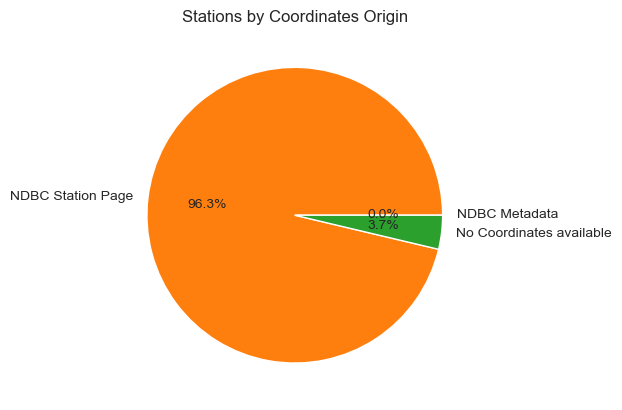

In [92]:
import matplotlib.pyplot as plt

# Create a pie chart
fig, ax = plt.subplots()
ax.pie([num_stations_c_file, num_stations_c_web, num_stations_no_c],
       labels=["NDBC Metadata",
               "NDBC Station Page",
               "No Coordinates available"],
       autopct='%1.1f%%',
       )

# Add a title
ax.set_title('Stations by Coordinates Origin')
# Display the chart
plt.show()

In [106]:
files_df_1 = metadata_1.dropna(subset=['lat', 'lon']).drop(["owner", "type", "lat", "lon"], axis=1)
files_df_2 = metadata_2.dropna(subset=['lat', 'lon']).drop(["owner", "type", "lat", "lon"], axis=1)
files_df_3 = metadata_3.dropna(subset=['lat', 'lon']).drop(["owner", "type", "lat", "lon"], axis=1)

sum_files = metadata_0.sum().sum()
sum_files_md_file = files_df_1.sum().sum()
sum_files_md_file_and_web = files_df_2.sum().sum()

print("Sum of available files: ", sum_files)
print("Files with coordinates out of ndbc-metadata file: ", sum_files_md_file)
print("Files with coordinates out of station_page: ", sum_files_md_file_and_web - sum_files_md_file)
print("Files without coordinates: ", sum_files - sum_files_md_file_and_web)

Sum of available files:  14940
Files with coordinates out of ndbc-metadata file:  0.0
Files with coordinates out of station_page:  14724.0
Files without coordinates:  216


In [107]:
metadata_0[range(1970, 1997)]

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996
0y2w3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4cONF,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4h361,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4h363,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4h364,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yabp4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
yata2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
ygnn6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
ykrv2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


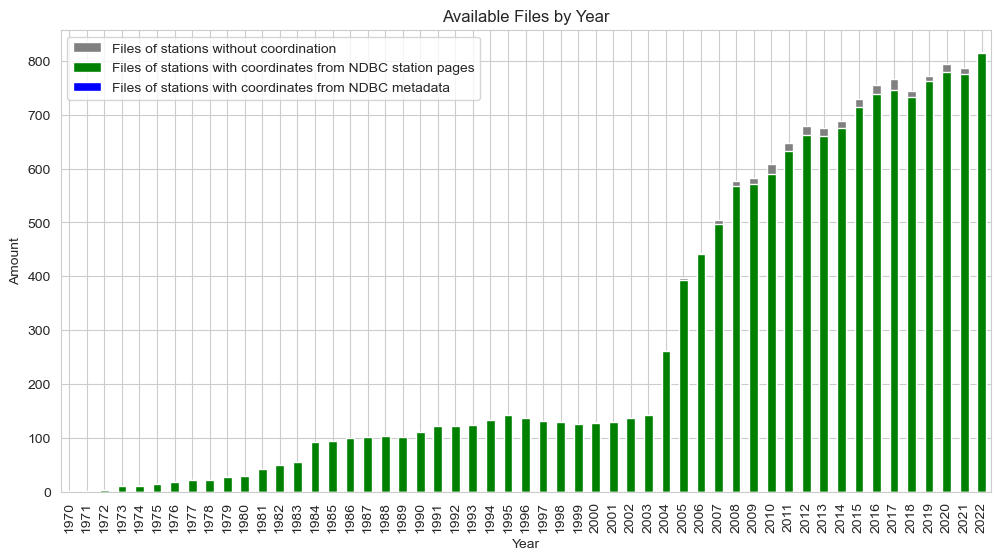

In [108]:
fig, ax = plt.subplots(figsize=(12,6))

metadata_0.sum().plot(kind='bar', color="gray", label='Files of stations without coordination')
files_df_2.sum().plot(kind='bar', color="green", label="Files of stations with coordinates from NDBC station pages")
files_df_1.sum().plot(kind='bar', color="blue", label="Files of stations with coordinates from NDBC metadata")

plt.title('Available Files by Year')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.legend()

# Show the plot
plt.show()

In [ ]:
import seaborn as sns

# Create a new figure with a size of 6x4 inches
#plt.figure(figsize=(20, 60))
plt.figure(figsize=(10, 11.69))

# Create a heatmap of the DataFrame
sns.heatmap(files_df_3.astype(bool), cmap='binary', annot=False, cbar=False)

plt.title("File Availability")
plt.show()

## White = files are available!

---
# Analyse stations that have been removed

In [96]:
print("Stations with no coordinates: \n")
print(metadata_2[metadata_2['lat'].isnull()].index)

Stations with no coordinates: 

Index(['4cONF', '4h361', '4h363', '4h364', '4h365', '4h390', '4h394', '32st1',
       '32st2', '41nt1', '41nt2', '42a02', '42a03', '42otp', '43WSL', '46a35',
       '46a54', '51wh1', '51wh2', '53ANF', '53MKF', '42360', '42361', '42362',
       '42363', '42364', '42365', '42369', '42370', '42374', '42375', '42376',
       '42390', '42392', '42394', '42395', '42887', '42902', '46074', '47072',
       'a002e', 'a025w', 'b040z', 'et01z', 'f022l', 'misma', 'plsfa', 'q004w'],
      dtype='object')


In [97]:
metadata_2[metadata_2['lat'].isna()]

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2017,2018,2019,2020,2021,2022,owner,type,lat,lon
4cONF,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,,,NaN,NaN
4h361,False,False,False,False,False,False,False,False,False,False,...,True,False,False,True,True,False,,,NaN,NaN
4h363,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,,,NaN,NaN
4h364,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,,,NaN,NaN
4h365,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,,,NaN,NaN
4h390,False,False,False,False,False,False,False,False,False,False,...,True,False,False,True,True,False,,,NaN,NaN
4h394,False,False,False,False,False,False,False,False,False,False,...,True,False,False,True,True,False,,,NaN,NaN
32st1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,,,NaN,NaN
32st2,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,False,,,NaN,NaN
41nt1,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,,,NaN,NaN


In [98]:
metadata_2[metadata_2['lat'].isna()].sum()

1970       0
1971       0
1972       0
1973       0
1974       0
1975       0
1976       0
1977       0
1978       0
1979       0
1980       0
1981       0
1982       0
1983       0
1984       0
1985       0
1986       0
1987       0
1988       0
1989       0
1990       0
1991       0
1992       0
1993       0
1994       0
1995       0
1996       1
1997       0
1998       0
1999       0
2000       3
2001       1
2002       0
2003       1
2004       0
2005       3
2006       2
2007       7
2008       9
2009      11
2010      18
2011      15
2012      17
2013      15
2014      13
2015      15
2016      16
2017      21
2018      11
2019       9
2020      15
2021      10
2022       3
owner       
type        
lat      0.0
lon      0.0
dtype: object

TypeError: no numeric data to plot

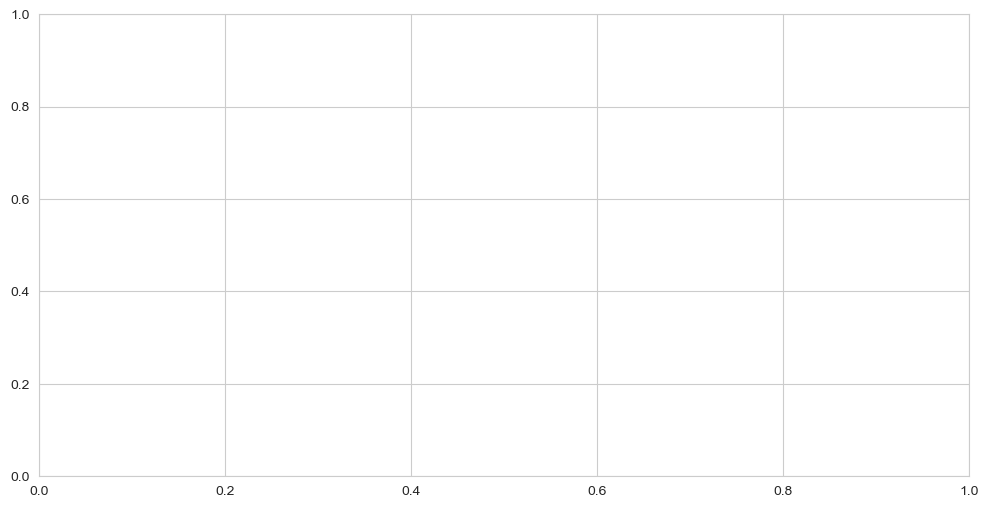

In [99]:
fig, ax = plt.subplots(figsize=(12,6))

metadata_2[metadata_2['lat'].isna()].sum().plot(kind='bar', color="gray", label='Files without coordination')

plt.title('Available Files by Year (Files with missing coordinates)')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.legend()

# Show the plot
plt.show()

In [100]:


from IPython.core.display_functions import display

owner_counts = metadata_2['owner'].value_counts()
for key, value in owner_counts.items():
    print(key, "  ", value)

NDBC    285
NOAA's National Ocean Service    227
NOAA's National Ocean Service Physical Oceanographic Real Time System Program (PORTS®)    91
Information submitted by Scripps Institution of Oceanography    77
Marine Exchange of Alaska    67
    48
Everglades National Park    39
National Weather Service Central Region    34
Texas Coastal Ocean Observing Network    31
COMPS (University of South Florida)    19
Pacific Islands Ocean Observing System (PacIOOS)Data provided by Scripps Institution of Oceanography    18
Great Lakes Environmental Research Laboratory    14
National Weather Service Eastern Region    14
Coastal Ocean Research and Monitoring Program (CORMP)    13
Chesapeake Bay Interpretive Buoy System    12
Northeastern Regional Association of Coastal Ocean Observing Systems    11
Integrated Coral Observing Network (ICON)    10
Limno Tech    10
Station owned and maintained by NWS Alaska Region    10
Sound Science Real Research in Real Time    10
Caribbean Integrated Coastal Ocean 

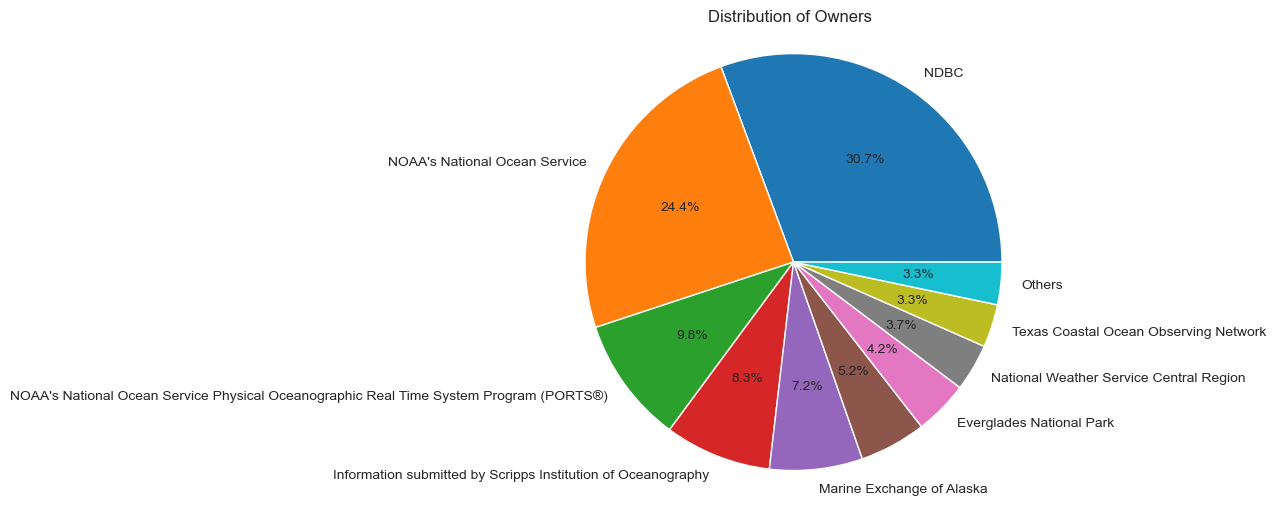

In [102]:
# Calculate percentages and filter owners below 2%
total_owners = sum(owner_counts)
percentages = (owner_counts / total_owners) * 100
filtered_indices = percentages >= 2

# Calculate the sum of filtered percentages for "others"
others_percentage = percentages[~filtered_indices].sum()

# Create new lists of labels and counts
filtered_labels = owner_counts.index[filtered_indices].tolist()
filtered_counts = owner_counts[filtered_indices].tolist()
filtered_labels.append("Others")
filtered_counts.append(others_percentage)

# Plot the modified pie chart
plt.figure(figsize=(8, 6))
plt.pie(filtered_counts, labels=filtered_labels, autopct='%1.1f%%')
plt.title('Distribution of Owners')
plt.axis('equal')
plt.show()